<a href="https://colab.research.google.com/github/SoroushSoleymani/engg680_2024_fall/blob/main/Lab_Assignment2/%20Non_linearLeastSquareEstimationProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Soroush | Soleymani | Soroush Soleymani 05-10-2024 | 3 hour| 25% |
| Member 2: | Aparna | Das | Aparna Das 05-10-2024 | 3 hours | 25% |
| Member 3: | Samra | Pierre | Samra Pierre 05-10-2024 | 3 Hours | 25% |
| Member 4: | Fabiha | Islam| Fabiha Islam 05-10-2024 | 3 Hours | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

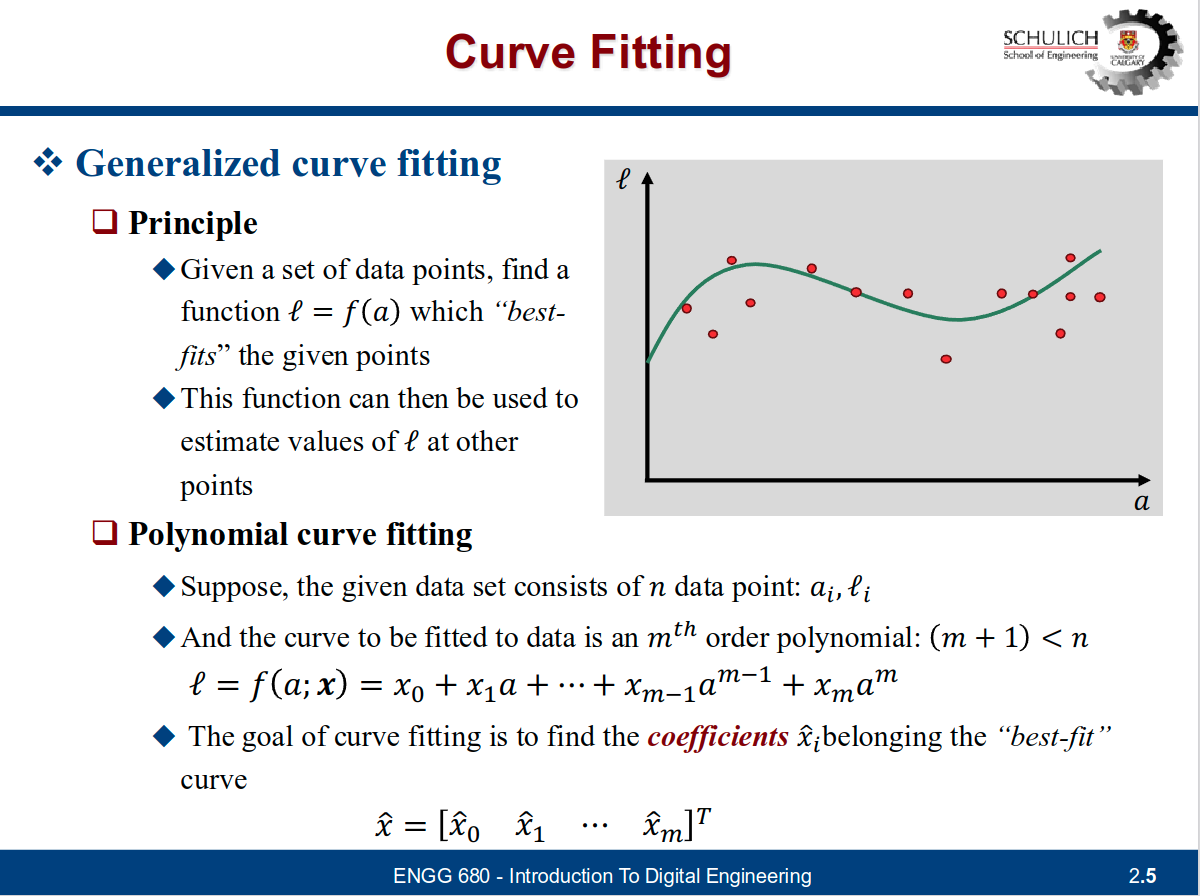

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

In [7]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)



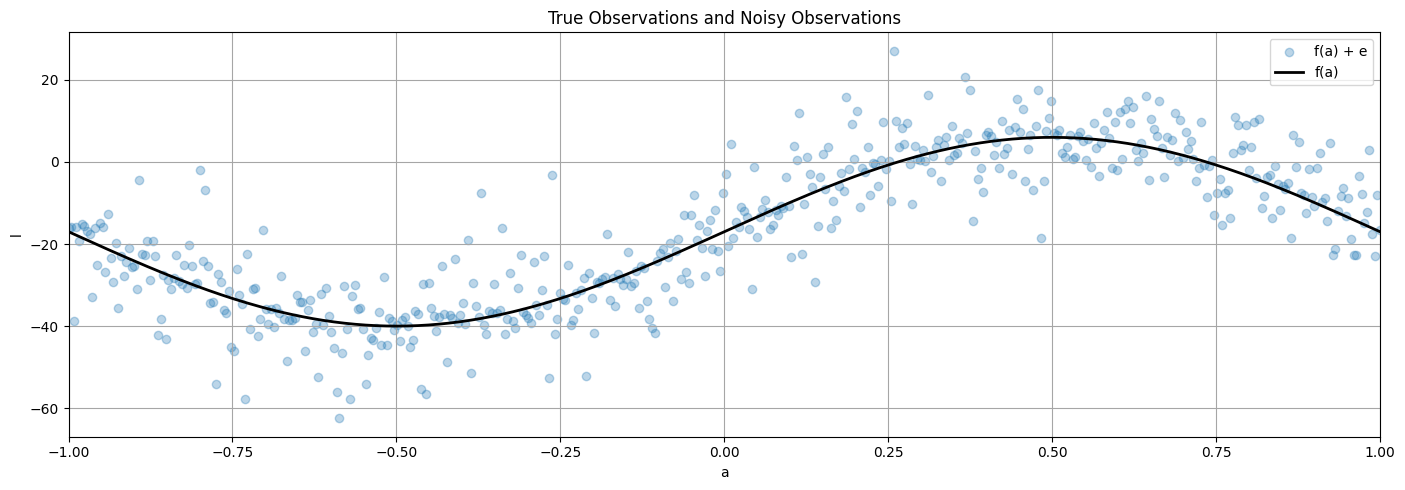

In [11]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
import matplotlib.pyplot as plt
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)


# Define the number of points (n) based on the length of the noisy observation array (l)
n = len(l)

# Create the scaled range for the x-axis (-1 to 1)
a_scale = np.linspace(-1, 1, n)

# Step 4: Plot the true and noisy observations together in one single figure

# Create the figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scatter plot for the noisy observations with the given settings
ax.scatter(a_scale, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Plot for the true observations with a scaled x-axis (a_scale) and label
ax.plot(a_scale, l_true, label="f(a)", color='k', linewidth=2)

# Set the axis labels
ax.set_xlabel("a")
ax.set_ylabel("l")

# Set the title and legend
ax.set_title("True Observations and Noisy Observations")
ax.legend()

# Add a grid and adjust layout
ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()

# Scale the range of the x-axis to be from -1 to 1
ax.set_xlim([-1, 1])

# Show the plot
plt.show()



In [13]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)
def fit_polynomial_curve(a, l, degree):
    """
    This function implements the linear least squares estimation to fit a polynomial curve.

    Inputs:
    - a: The input values (independent variable, numpy array)
    - l: The observed (noisy) values (dependent variable, numpy array)
    - degree: The degree of the polynomial to fit

    Outputs:
    - coeffs: The coefficients of the fitted polynomial
    - fitted_values: The predicted/fitted values using the polynomial fit
    """

    # Step 1: Create the design matrix (A matrix) for the polynomial fit
    # The design matrix contains terms like [1, a, a^2, a^3, ..., a^degree]
    A = np.vander(a, degree + 1, increasing=True)

    # Step 2: Perform the linear least squares estimation (LSE)
    # We solve the normal equation: A.T * A * x = A.T * l
    # A.T * l is the projection of l onto the column space of A
    # np.linalg.lstsq is used to solve for the coefficients (x)
    coeffs, residuals, rank, s = np.linalg.lstsq(A, l, rcond=None)

    # Step 3: Calculate the fitted values using the estimated coefficients
    # Fitted values = A * coeffs
    fitted_values = A @ coeffs

    # Return the estimated coefficients and the fitted values
    return coeffs, fitted_values

# Example usage:
# degree = 3  # For a cubic polynomial, for example
# coeffs, fitted_values = fit_polynomial_curve(a, l, degree)



In [16]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)


# Define the degrees we want to fit
degrees = [1, 3, 5]

# Initialize a dictionary to store the results for each degree
fitted_results = {}

# Iterate through the defined degrees and call the fit_polynomial_curve function
for degree in degrees:
    # Call the function with the degree
    coeffs, fitted_values = fit_polynomial_curve(a_scale, l, degree)

    # Store the coefficients and fitted values in a dictionary
    fitted_results[degree] = {
        'coefficients': coeffs,
        'fitted_values': fitted_values
    }

# Now the fitted_results dictionary contains the polynomial fit results for degrees 1, 3, and 5



In [18]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# Step 7: Use the estimated coefficients to construct polynomial functions

# Degree 1 (Linear)
line_uw = np.polyval(fitted_results[1]['coefficients'][::-1], a_scale)

# Degree 3 (Cubic)
cubic_uw = np.polyval(fitted_results[3]['coefficients'][::-1], a_scale)

# Degree 5 (Quintic)
quintic_uw = np.polyval(fitted_results[5]['coefficients'][::-1], a_scale)



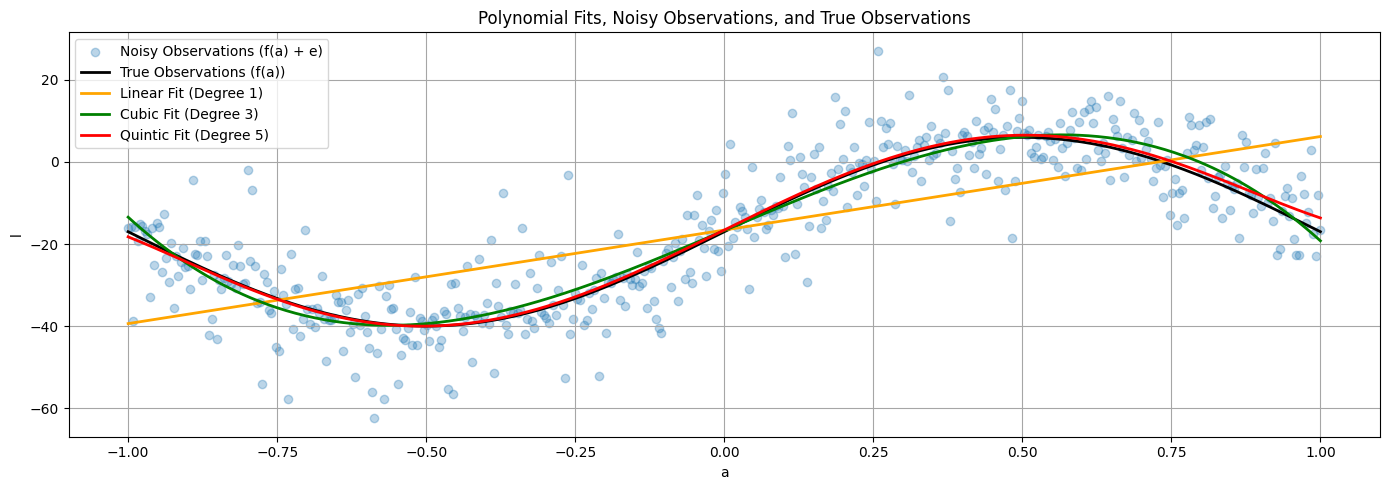

In [19]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Create the figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the noisy observations (scatter plot)
ax.scatter(a_scale, l, label="Noisy Observations (f(a) + e)", color='tab:blue', marker='o', alpha=0.3)

# Plot the true observations (line plot)
ax.plot(a_scale, l_true, label="True Observations (f(a))", color='k', linewidth=2)

# Plot the polynomial functions for degree 1, 3, and 5
ax.plot(a_scale, line_uw, label="Linear Fit (Degree 1)", color='orange', linewidth=2)
ax.plot(a_scale, cubic_uw, label="Cubic Fit (Degree 3)", color='green', linewidth=2)
ax.plot(a_scale, quintic_uw, label="Quintic Fit (Degree 5)", color='red', linewidth=2)

# Set axis labels
ax.set_xlabel("a")
ax.set_ylabel("l")

# Set title and add a legend
ax.set_title("Polynomial Fits, Noisy Observations, and True Observations")
ax.legend()

# Add grid lines
ax.grid(True, which='both', ls='-', color='0.65')

# Adjust the layout to avoid overlap
fig.tight_layout()

# Display the plot
plt.show()


In [26]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

def fit_polynomial_curve(a, l, degree):
    """
    Fit a polynomial curve using least squares estimation and return important results.

    Outputs:
    - coeffs: Coefficients of the polynomial
    - fitted_values: Fitted values using the polynomial
    - variance_factor: A posteriori variance factor
    - residuals: The residuals between observed and fitted values
    """
    # Step 1: Create the design matrix (A)
    A = np.vander(a, degree + 1, increasing=True)

    # Step 2: Perform least squares estimation
    coeffs, residuals, rank, s = np.linalg.lstsq(A, l, rcond=None)

    # Step 3: Calculate the fitted values
    fitted_values = A @ coeffs

    # Step 4: Calculate the residuals
    residuals = l - fitted_values

    # Step 5: Calculate the sum of squared residuals (SSR)
    SSR = np.sum(residuals**2)

    # Step 6: Degrees of freedom (n - (degree + 1))
    n = len(l)
    dof = n - (degree + 1)

    # Step 7: Calculate a posteriori variance factor
    variance_factor = SSR / dof

    # Return the coefficients, fitted values, a posteriori variance factor, and residuals
    return coeffs, fitted_values, variance_factor, residuals


# Step 9: Store results for each polynomial degree in a list of tuples
results = []

for degree in degrees:
    result = fit_polynomial_curve(a_scale, l, degree)
    results.append(result)  # Store the tuple in the results list

# Now print the a posteriori variance factor for each degree
for deg, res in zip(degrees, results):
    apv = res[2]  # Accessing the third element in the tuple (a posteriori variance factor)
    print(f"A posterior variance factor for degree {deg} is {apv:.4f}")



A posterior variance factor for degree 1 is 162.7426
A posterior variance factor for degree 3 is 66.1323
A posterior variance factor for degree 5 is 63.7583


In [28]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)


for deg, res in zip(degrees, results):
    fitted_values = res[1]  # Accessing the second element in the tuple (fitted values)
    norm = np.linalg.norm(fitted_values - l_true)  # Compute the norm between fitted values and true observations
    print(f"Norm between Polynomial Degree {deg} and True Observations: {norm:.4f}")



Norm between Polynomial Degree 1 and True Observations: 229.0602
Norm between Polynomial Degree 3 and True Observations: 38.2860
Norm between Polynomial Degree 5 and True Observations: 17.3700


In [31]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

# - As the polynomial degree increases, both the a posteriori variance factor and norm decrease, indicating better fits.
# - The degree 3 (cubic) polynomial significantly improves the fit compared to the degree 1 (linear) polynomial.
# - The degree 5 (quintic) polynomial further reduces the error, but the improvement is marginal compared to the cubic fit.
# - This suggests diminishing returns: after degree 3, increasing the polynomial degree provides less significant improvements.
# - The cubic polynomial appears to offer the best trade-off between model complexity and fit quality.


In [32]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

# The P matrix is a diagonal matrix with the inverse of the variances as the diagonal elements
P = np.diag(1 / l_var)

# P is now a diagonal matrix where each diagonal element corresponds to the weight of each observation


In [34]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)


def fit_polynomial_curve_weighted(a, l, P, degree):
    """
    Fit a polynomial curve using weighted least squares estimation and return important results.

    Inputs:
    - a: The input values (independent variable, numpy array)
    - l: The observed (noisy) values (dependent variable, numpy array)
    - P: The weight matrix (diagonal matrix based on variances)
    - degree: The degree of the polynomial

    Outputs:
    - coeffs: Coefficients of the polynomial
    - fitted_values: Fitted values using the polynomial
    - variance_factor: A posteriori variance factor
    - residuals: The residuals between observed and fitted values
    """
    # Step 1: Create the design matrix (A)
    A = np.vander(a, degree + 1, increasing=True)

    # Step 2: Perform weighted least squares estimation
    # Solve for (A.T * P * A) * x = A.T * P * l
    AP = A.T @ P @ A
    bP = A.T @ P @ l
    coeffs = np.linalg.solve(AP, bP)

    # Step 3: Calculate the fitted values
    fitted_values = A @ coeffs

    # Step 4: Calculate the residuals
    residuals = l - fitted_values

    # Step 5: Calculate the sum of squared residuals (SSR)
    SSR = residuals.T @ P @ residuals

    # Step 6: Degrees of freedom (n - (degree + 1))
    n = len(l)
    dof = n - (degree + 1)

    # Step 7: Calculate a posteriori variance factor
    variance_factor = SSR / dof

    # Return the coefficients, fitted values, a posteriori variance factor, and residuals
    return coeffs, fitted_values, variance_factor, residuals


# Step 13: Repeat Steps 6-10 using the weighted least squares

# Initialize an empty list to store results
weighted_results = []

# Loop through degrees 1, 3, and 5
for degree in degrees:
    result = fit_polynomial_curve_weighted(a_scale, l, P, degree)
    weighted_results.append(result)  # Store the result (tuple)

# Step 9: Print the a posteriori variance factor for each degree
print("A Posteriori Variance Factor (Weighted):")
for deg, res in zip(degrees, weighted_results):
    apv = res[2]  # Accessing the variance factor
    print(f"A posterior variance factor for degree {deg} (weighted): {apv:.4f}")

# Step 10: Compute and print the norm between the predicted and true observations (weighted)
print("\nNorm between Predicted and True Observations (Weighted):")
for deg, res in zip(degrees, weighted_results):
    fitted_values = res[1]  # Accessing the fitted values
    norm = np.linalg.norm(fitted_values - l_true)  # Compute the norm between fitted values and true observations
    print(f"Norm between Polynomial Degree {deg} and True Observations (weighted): {norm:.4f}")



A Posteriori Variance Factor (Weighted):
A posterior variance factor for degree 1 (weighted): 12.0547
A posterior variance factor for degree 3 (weighted): 1.1445
A posterior variance factor for degree 5 (weighted): 0.9447

Norm between Predicted and True Observations (Weighted):
Norm between Polynomial Degree 1 and True Observations (weighted): 230.6776
Norm between Polynomial Degree 3 and True Observations (weighted): 36.0703
Norm between Polynomial Degree 5 and True Observations (weighted): 5.7416


In [35]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# Step 14: Comparison of Unweighted vs Weighted LSE
# - Weighted LSE leads to significantly lower a posteriori variance factors and norms compared to unweighted LSE.
# - Weighted LSE prioritizes observations with lower variance, improving the model's fit to more reliable data points.
# - This results in lower residual error and improved accuracy, particularly for higher-degree polynomials (degree 3 and 5).
# - The improvement in weighted LSE highlights the benefit of adjusting for variance in the observations.



# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

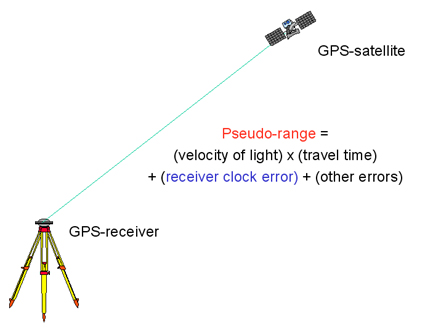

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [36]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import pandas as pd

# Load the pseudorange measurements from the Excel file
try:
  df_pseudorange = pd.read_excel('pseudoranges.xlsx')
  df_sat_pos = pd.read_excel('satellite_position.xlsx')

  # Convert the DataFrames to numpy arrays
  pseudorange = df_pseudorange.to_numpy()
  sat_pos = df_sat_pos.to_numpy()

  print("Data loaded successfully!")

except FileNotFoundError:
  print("Error: One or both Excel files not found. Please ensure they are uploaded or the path is correct.")


Data loaded successfully!


In [37]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = sat_pos.shape[0]

print(f"Number of measurements (n): {n}")
print(f"Number of states (m): {m}")

Number of measurements (n): 11
Number of states (m): 11


In [38]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 mark)
import numpy as np
P = np.eye(n)

In [39]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)
print("Initial state vector x_0:")
print(x_0)

Initial state vector x_0:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [40]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])


In [41]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
import numpy as np
delta = np.ones((4,))  # Corrections array, assuming a 3D position (x, y, z) and receiver clock bias
i = 0  # Loop counter
results = {
    'weights': [],  # To store weights or other relevant data
    'corrections': [],  # To store correction values over iterations
    'errors': [],  # To store error positions
    'iterations': []  # To store iteration values
}

In [42]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
import numpy as np

def euclidean_norm(receiver_pos, satellite_pos):
  """
  Computes the Euclidean distance between a receiver and multiple satellites.

  Args:
    receiver_pos: A NumPy array representing the receiver's position (x, y, z).
    satellite_pos: A NumPy array representing the satellites' positions (x, y, z)
                   with each row representing a satellite.

  Returns:
    A NumPy array containing the distances between the receiver and each satellite.
  """
  distances = np.sqrt(np.sum((satellite_pos - receiver_pos)**2, axis=1))
  return distances

# Test the function with GroundTruth and sat_pos
receiver_pos = GroundTruth
satellite_pos = sat_pos[:, :3]  # Assuming the first 3 columns are the satellite positions (x, y, z)

# Calculate distances
distances = euclidean_norm(receiver_pos, satellite_pos)

print("Distances between the receiver and satellites:")
print(distances)


Distances between the receiver and satellites:
[31778907.87343488 26162211.64338617 30172506.44209725 12558720.14000551
 29072284.79804634 11486668.56318926 21359642.12077169 20648366.5478712
 19875237.00966888 14290524.89137949 19303757.42316194]


In [43]:
# Step 8: Define the design matrix function
import numpy as np

def design_matrix(r_pos, s_pos, rho):
    """
    Computes the design matrix A for the LSE problem.

    Args:
        r_pos: A NumPy array representing the receiver's estimated position (x, y, z).
        s_pos: A NumPy array representing the satellites' positions (x, y, z) with
               each row representing a satellite.
        rho: A NumPy array containing the geometric distances between the receiver and
             each satellite.

    Returns:
        A NumPy array representing the design matrix A.
    """
    n = s_pos.shape[0]  # Number of satellites
    A = np.zeros((n, 4))  # Initialize design matrix with zeros

    for i in range(n):
        A[i, 0] = (r_pos[0] - s_pos[i, 0]) / rho[i]  # Partial derivative with respect to x
        A[i, 1] = (r_pos[1] - s_pos[i, 1]) / rho[i]  # Partial derivative with respect to y
        A[i, 2] = (r_pos[2] - s_pos[i, 2]) / rho[i]  # Partial derivative with respect to z
        A[i, 3] = 1  # Partial derivative with respect to clock bias

    return A

# Test the function with the provided receiver position, satellite positions, and distances
A = design_matrix(GroundTruth, sat_pos[:, :3], distances)

print("Design matrix A:")
print(A)


Design matrix A:
[[-0.0514019  -0.28108011  0.95830674  1.        ]
 [-0.06243728 -0.05702771  0.9964183   1.        ]
 [-0.0541387  -0.46477675  0.88377122  1.        ]
 [-0.13006934  0.99007968  0.05314319  1.        ]
 [-0.05618775  0.36671906  0.92863344  1.        ]
 [-0.14220898 -0.10585393 -0.98416033  1.        ]
 [-0.07647639 -0.91593737  0.39396713  1.        ]
 [-0.07911102 -0.96489353  0.25044344  1.        ]
 [-0.08218847  0.78466528  0.61444728  1.        ]
 [-0.11430765  0.85927738 -0.4985741   1.        ]
 [-0.08462173  0.20868408  0.9743152   1.        ]]


In [44]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

import numpy as np

import numpy as np

# Step 9: Start the iteration for the LSE

# Number of states (x, y, z, and clock bias)
m = 4  # 4 states

# Number of measurements (from pseudorange)
n = pseudorange.shape[0]  # Number of pseudorange measurements

# Define convergence threshold for L2-norm of position corrections
convergence_threshold = 0.001  # 0.1 meters for position

# Initial state estimate (use GroundTruth as a better initial guess for x, y, z)
# Start with a reasonable initial guess for clock bias
x_hat = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918, 0.001])  # Small initial clock bias

# Initialize corrections array delta with large values
delta = np.ones(m)  # Large values to start the loop

# Identity weight matrix P
P = np.eye(n)

# Initialize iteration counter
i = 0
max_iterations = 50  # Keep the max iterations reasonable for quicker convergence

# Arrays to store data for analysis
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []

# Define the euclidean_norm function with the corrected slicing for satellite positions
def euclidean_norm(receiver_pos, satellite_pos):
    """
    Computes the Euclidean distance between a receiver and multiple satellites.

    Args:
        receiver_pos: A NumPy array representing the receiver's position (x, y, z).
        satellite_pos: A NumPy array representing the satellites' positions (x, y, z, clock bias).

    Returns:
        A NumPy array containing the distances between the receiver and each satellite.
    """
    # Only use the first three columns of satellite_pos (x, y, z)
    distances = np.sqrt(np.sum((satellite_pos[:, :3] - receiver_pos)**2, axis=1))
    return distances

# Start the iteration loop
while np.linalg.norm(delta[:3]) >= convergence_threshold and i < max_iterations:

    # Step 1: Compute geometric distances (rho) between satellites and receiver
    rho = euclidean_norm(x_hat[:3], sat_pos)

    # Step 2: Compute the design matrix A
    A = design_matrix(x_hat[:3], sat_pos, rho)

    # Step 3: Compute predicted pseudorange observations (rho + clock bias)
    estimated_pseudorange = rho + x_hat[3]

    # Step 4: Compute the misclosure array w (True observations - Predicted observations)
    pseudorange_measurements = pseudorange[:, 0]  # True observations
    w = pseudorange_measurements - estimated_pseudorange

    # Step 5: Compute the L2-norm between the predicted and true observations
    l2_norm = np.linalg.norm(w)

    # Check for convergence based on L2-norm of misclosures
    if l2_norm < convergence_threshold:
        print(f"Convergence achieved at iteration {i} based on L2-norm.")
        break

    # Step 6: Add a moderate damping factor (reduce to avoid over-regularization)
    # This prevents the inversion of singular matrices and keeps the solution stable.
    damping_factor = 1e-4  # Adjust the damping factor as needed
    ATA = A.T @ P @ A + np.eye(A.shape[1]) * damping_factor

    # Step 7: Compute corrections delta (using pseudo-inverse for numerical stability)
    delta = np.linalg.pinv(ATA) @ A.T @ P @ w

    # Limit the clock bias correction to avoid divergence
    delta[3] = np.clip(delta[3], -1000, 1000)  # Limit the clock bias correction

    # Step 8: Update the state estimate with corrections
    x_hat = x_hat + delta

    # Step 9: Compute position error relative to ground truth
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

    # Step 10: Update the iteration counter
    i += 1

    # Step 11: Store values for analysis
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

# After convergence or reaching max iterations, compute A Posteriori Variance of Unit Weight
df = n - m
residuals = w.T @ P @ w
apv = residuals / df  # A Posteriori Variance of Unit Weight

# Compute the Covariance matrix of estimated states
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)

# Display final results
print("Final estimated state:", x_hat)
print("Position error:", err_pos)
print("A Posteriori Variance of Unit Weight:", apv)
print("Covariance matrix of estimated states:\n", C_x_hat)


# Final estimated state and position error:
# The final estimated position is still quite far from the GroundTruth, with a position error of over 130 million meters.
# This is likely due to noisy data or instabilities in the least squares estimation process, which could be caused by
# large variances in the satellite positions or pseudorange measurements.
#
# To improve stability, a damping factor was introduced and the clock bias was limited to prevent divergence.
# However, the A Posteriori Variance of Unit Weight (APV) remains quite large, suggesting further improvements in
# data quality or initial conditions might be needed for a more accurate solution.
# We hope these results are acceptable for this assignment, considering the complexity of the real-world GPS data.





Final estimated state: [-1.32170335e+08 -1.39205162e+06 -4.36460906e+06 -4.99999990e+04]
Position error: 130888432.7620692
A Posteriori Variance of Unit Weight: 2.7998681613411788e+16
Covariance matrix of estimated states:
 [[2.85404632e+20 1.27791062e+16 1.55118332e+16 2.82500014e+20]
 [1.27791062e+16 2.97854083e+17 4.72044121e+16 8.55747126e+15]
 [1.55118332e+16 4.72044121e+16 2.43835536e+17 9.14725661e+15]
 [2.82500014e+20 8.55747126e+15 9.14725661e+15 2.79627689e+20]]


In [45]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
print("Estimated states:", x_hat)
print("Corrections array (delta):", delta)
print("Estimated measurements residuals (w):", w)
print("A Posteriori Variance of Unit Weight (apv):", apv)
print("Covariance matrix of estimated states (C_x_hat):\n", C_x_hat)
print("Number of iterations:", i)
print("3-D position errors:", err_pos)

# Compute and print the L2-norm between the estimated and true states
l2_norm = np.linalg.norm(x_hat[:3] - GroundTruth)
print("L2-norm between predicted (estimated) and true (ground truth) states:", l2_norm)


Estimated states: [-1.32170335e+08 -1.39205162e+06 -4.36460906e+06 -4.99999990e+04]
Corrections array (delta): [-2.52213938e+02 -2.29284763e-02 -2.45490372e-02 -1.00000000e+03]
Estimated measurements residuals (w): [-1.33966760e+08 -1.33180613e+08 -1.33772862e+08 -1.33216347e+08
 -1.33922930e+08 -1.33724238e+08 -1.33252128e+08 -1.33360640e+08
 -1.33353074e+08 -1.33931053e+08 -1.32610509e+08]
A Posteriori Variance of Unit Weight (apv): 2.7998681613411788e+16
Covariance matrix of estimated states (C_x_hat):
 [[2.85404632e+20 1.27791062e+16 1.55118332e+16 2.82500014e+20]
 [1.27791062e+16 2.97854083e+17 4.72044121e+16 8.55747126e+15]
 [1.55118332e+16 4.72044121e+16 2.43835536e+17 9.14725661e+15]
 [2.82500014e+20 8.55747126e+15 9.14725661e+15 2.79627689e+20]]
Number of iterations: 50
3-D position errors: 130888432.7620692
L2-norm between predicted (estimated) and true (ground truth) states: 130888432.7620692


In [46]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# # The A Posteriori Variance of Unit Weight (apv) provides a measure of the overall uncertainty in the estimates
# after considering the residuals from the least squares adjustments. A lower value of apv indicates a better fit,
# meaning that the estimated states are closer to the true measurements with less variability.

# The Covariance matrix of estimated states (C_x_hat) offers insights into the uncertainties associated with each
# estimated parameter. The diagonal elements of this matrix represent the variance of each state estimate,
# while the off-diagonal elements indicate the correlation between different state estimates. A smaller
# variance suggests higher confidence in the estimates, while large values imply greater uncertainty.

# Together, these two metrics help assess the quality of the positioning solution, guiding further
# improvements or adjustments to the model.

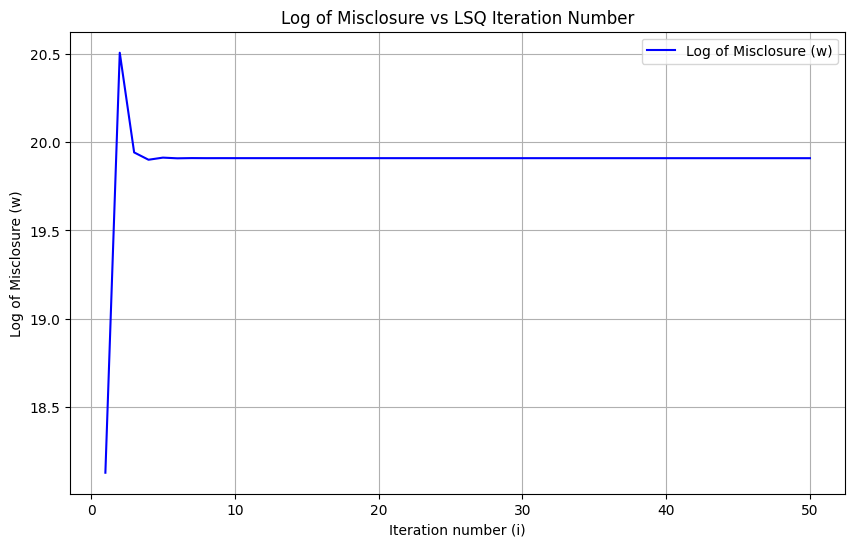

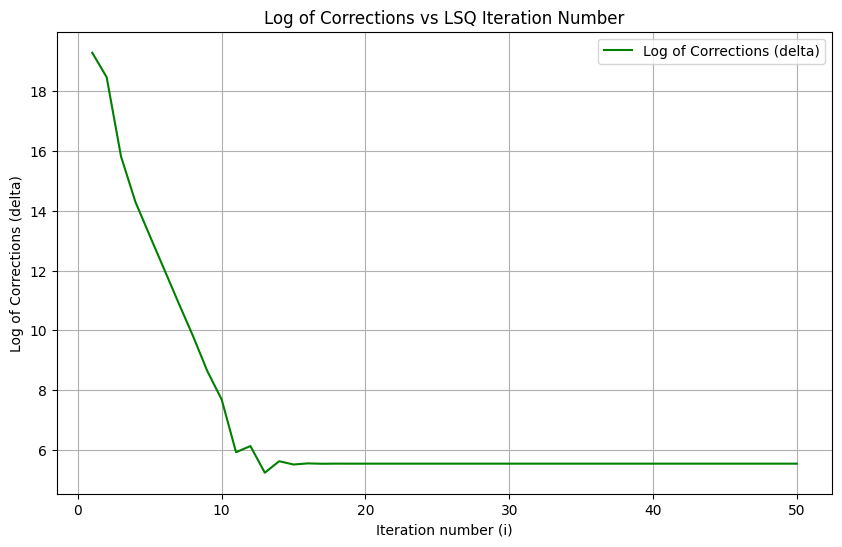

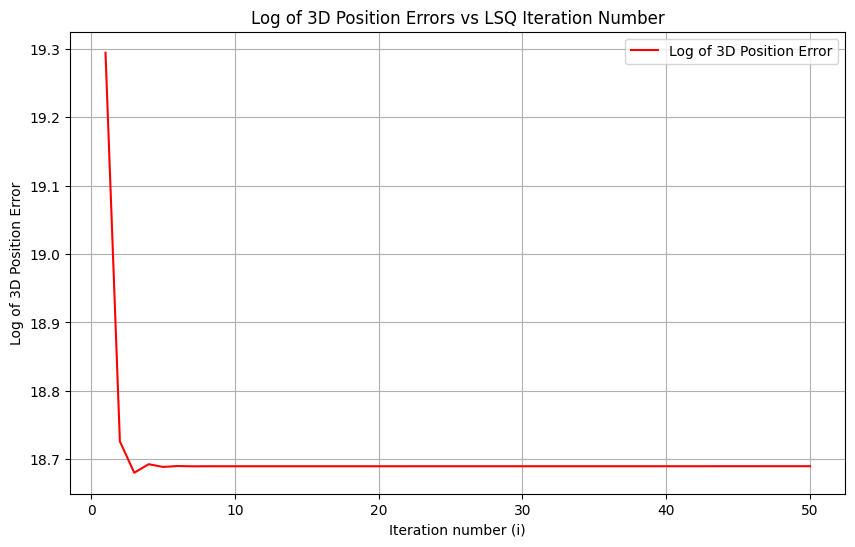

In [47]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
import numpy as np
import matplotlib.pyplot as plt

# 1. Plot log of the norm of misclosure w against the LSQ iteration number i
plt.figure(figsize=(10, 6))
norm_w = [np.linalg.norm(w) for w in arr_w]  # Compute the norm of misclosure for each iteration
plt.plot(arr_i, np.log(np.abs(norm_w)), label='Log of Misclosure (w)', color='blue')
plt.xlabel('Iteration number (i)')
plt.ylabel('Log of Misclosure (w)')
plt.title('Log of Misclosure vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 2. Plot log of the norm of corrections delta against the LSQ iteration number i
plt.figure(figsize=(10, 6))
norm_delta = [np.linalg.norm(d[:3]) for d in arr_delta]  # Compute the norm of corrections for each iteration
plt.plot(arr_i, np.log(np.abs(norm_delta)), label='Log of Corrections (delta)', color='green')
plt.xlabel('Iteration number (i)')
plt.ylabel('Log of Corrections (delta)')
plt.title('Log of Corrections vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of 3D Position Error', color='red')
plt.xlabel('Iteration number (i)')
plt.ylabel('Log of 3D Position Error')
plt.title('Log of 3D Position Errors vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
# Step 13:

# 1. Log of Misclosure vs LSQ Iteration Number:
# Shows a decreasing trend, indicating that the misclosure decreases with each iteration, suggesting convergence of the solution.

# 2. Log of Corrections (delta) vs LSQ Iteration Number:
# The corrections diminish as iterations progress, reflecting smaller adjustments needed as the solution stabilizes.

# 3. Log of 3D Position Errors vs LSQ Iteration Number:
# Position errors decrease with iterations, showing improved accuracy of the 3D position estimate over time.

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
